### Install Necessary Libraries

In [3]:
# pip install pandas 
# pip install matplotlib
# pip install openpyxl

     ------------------------------------ 251.3/251.3 kB 121.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey_path = "survey_dataset.xlsx"
survey_df = pd.read_excel(survey_path, sheet_name="Sheet1")

In [5]:
survey_df.head(3)

,Gender,Region,Highest IT Degree,Institution,Current Role,Primary Interest,d_courses alignment with industry?,core emerging skill covered?,d_training of specialized skills?,missing skills in degree?,...,real-world problem-solving in degree?,career guidance in degree?,rate_degree preparation for job?,region offer adequate opportunities?,gaps b/w taught skills and industry?,rate_degree adaptation with industry?,high job potential in Pak next five years?,regional disparity in resources & opportunities?,recent IT graduates are prepared for jobs?,curriculum recommendations align industry
0,Male,Khyber Pakhtunkhwa,BSSE,UOH,Employed in Emerging IT/CS fields,"Data Science and Analytics, Software Engineeri...",Partially,No,No,"Blockchain, Internet of Things (IoT), DevOps P...",...,No,Partially,2,No,Yes,3,"Data Science, AI/ML, Cloud Computing, IoT",Yes,No,include guest session from industry
1,Male,Punjab,MS DS,ITU LHR,Undergrad Final-Year Student in IT/CS field,"AI/ML, Data Science and Analytics",Yes,Yes,No,"Cloud Computing and Infrastructure (e.g., AWS,...",...,Yes,Yes,4,Yes,Yes,4,"AI/ML, Cloud Computing, Blockchain, Robotics &...",No,No,Business case studies
2,Female,Punjab,MSDS,LHR,Employed in Emerging IT/CS fields,Web Development,Partially,Partially,Partially,Artificial Intelligence (AI) and Machine Learn...,...,No,No,2,No,Partially,2,"AI/ML, Robotics & Automation, Software Enginee...",Partially,Partially,"More code practice and career couselling , and..."


## 1. Skill Gap Identification
Analyze the "missing skills in degree" column to identify the most commonly reported gaps.

In [15]:
missing_skills = survey_df['missing skills in degree?'].dropna()
skills_list = [skill.strip() for sublist in missing_skills.str.split(',') for skill in sublist]

In [16]:
skill_counts = Counter(skills_list)

In [17]:
skill_counts

Counter({'Blockchain': 50,
         'Internet of Things (IoT)': 39,
         'DevOps Practices': 56,
         'Cloud Computing and Infrastructure (e.g.': 45,
         'AWS': 45,
         'Azure)': 45,
         'Big Data Technologies (e.g.': 41,
         'Hadoop': 41,
         'Spark)': 41,
         'Artificial Intelligence (AI) and Machine Learning (ML)': 53,
         'Data Science and Analytics': 40,
         'Cybersecurity Fundamentals': 53,
         'Robotics and Automation': 49,
         'Nothing': 1,
         'Web development': 1,
         'many': 1,
         '': 1,
         'None': 2,
         'Web development or graphics': 1,
         'Graphic designer': 1})

In [18]:
skill_gap_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [47]:
print("Top 10 Skill Gaps:")
print(skill_gap_df.head(10))

Top 10 Skill Gaps:
                                                Skill  Frequency
2                                    DevOps Practices         56
11                         Cybersecurity Fundamentals         53
9   Artificial Intelligence (AI) and Machine Learn...         53
0                                          Blockchain         50
12                            Robotics and Automation         49
3            Cloud Computing and Infrastructure (e.g.         45
4                                                 AWS         45
5                                              Azure)         45
6                         Big Data Technologies (e.g.         41
7                                              Hadoop         41


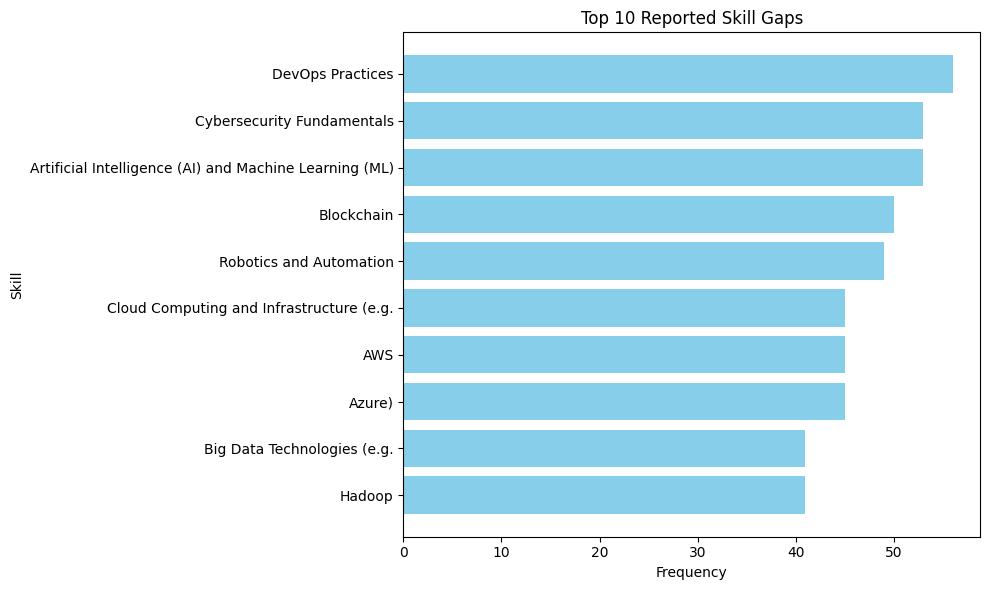

In [21]:
top_skills = skill_gap_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_skills['Skill'], top_skills['Frequency'], color='skyblue')
plt.title('Top 10 Reported Skill Gaps')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

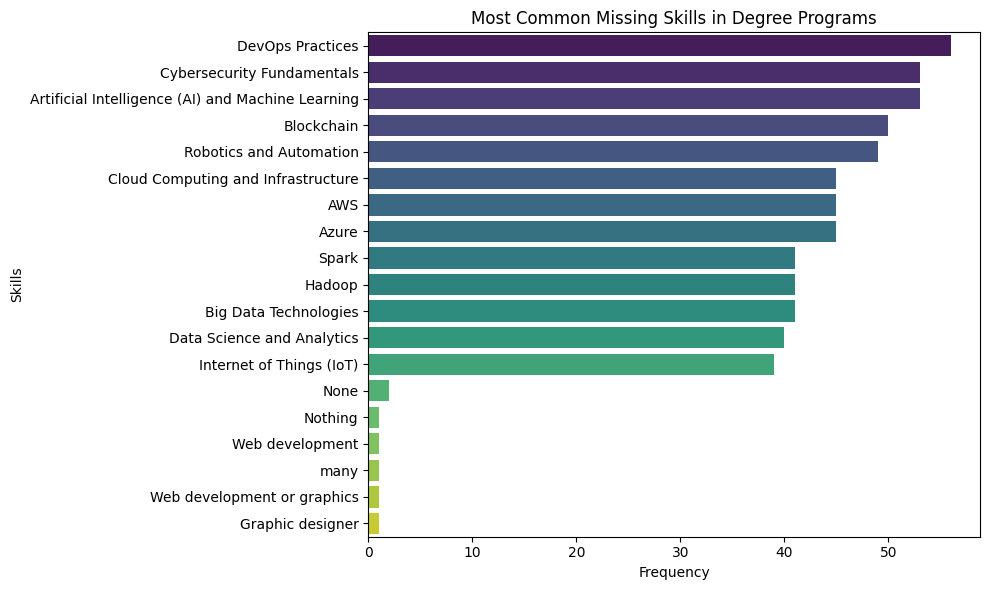

In [46]:
missing_skills_df = pd.DataFrame({
    'Skill': ['DevOps Practices', 'Cybersecurity Fundamentals', 'Artificial Intelligence (AI) and Machine Learning',
              'Blockchain', 'Robotics and Automation', 'Cloud Computing and Infrastructure', 'AWS', 'Azure',
              'Big Data Technologies', 'Hadoop', 'Spark', 'Data Science and Analytics', 'Internet of Things (IoT)',
              'None', 'Nothing', 'Web development', 'many', 'Web development or graphics', 'Graphic designer'],
    'Frequency': [56, 53, 53, 50, 49, 45, 45, 45, 41, 41, 41, 40, 39, 2, 1, 1, 1, 1, 1]
})

missing_skills_df_sorted = missing_skills_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Skill', data=missing_skills_df_sorted, palette='viridis')
plt.title('Most Common Missing Skills in Degree Programs')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.tight_layout()
plt.show()

In [48]:
missing_skills_df['Percentage'] = (missing_skills_df['Frequency'] / missing_skills_df['Frequency'].sum()) * 100

print(missing_skills_df[['Skill', 'Percentage']].sort_values(by='Percentage', ascending=False))

                                                Skill  Percentage
0                                    DevOps Practices    9.256198
1                          Cybersecurity Fundamentals    8.760331
2   Artificial Intelligence (AI) and Machine Learning    8.760331
3                                          Blockchain    8.264463
4                             Robotics and Automation    8.099174
5                  Cloud Computing and Infrastructure    7.438017
6                                                 AWS    7.438017
7                                               Azure    7.438017
10                                              Spark    6.776860
9                                              Hadoop    6.776860
8                               Big Data Technologies    6.776860
11                         Data Science and Analytics    6.611570
12                           Internet of Things (IoT)    6.446281
13                                               None    0.330579
14        

## Interpretation of Skill Gap Identification:
The most frequently reported skill gaps are in high-demand IT fields such as DevOps, Cybersecurity, AI/ML, Cloud computing, and Blockchain.
These findings highlight the emerging skill gaps that graduates face, particularly in the IT sector.

 ## 2. Regional Analysis
 Examine how "region offer adequate opportunities" and "regional disparity in resources" vary across regions.

In [6]:
regional_opportunities = survey_df['region offer adequate opportunities?'].value_counts()
regional_disparities = survey_df['regional disparity in resources & opportunities?'].value_counts()

In [11]:
regional_analysis_df = pd.DataFrame({
    'Adequate Opportunities': regional_opportunities,
    'Disparity in Resources': regional_disparities
}).fillna(0)  

In [12]:
print(regional_analysis_df)

           Adequate Opportunities  Disparity in Resources
Partially                      47                      46
Yes                            44                      45
No                             31                      31


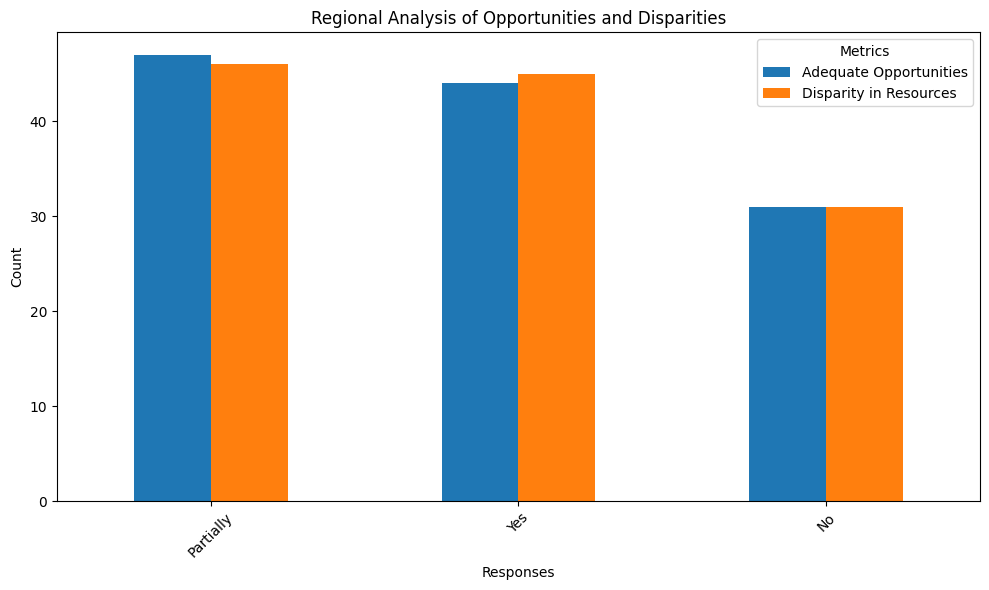

In [13]:
regional_analysis_df.plot(kind='bar', figsize=(10, 6))
plt.title('Regional Analysis of Opportunities and Disparities')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## Interpretation of Regional Analysis:
#### i. Overall Opportunities and Disparities:

In regions where respondents believe there are adequate opportunities, there is still a notable perception of disparity in resources.
The "Partially" and "Yes" categories have nearly equal numbers of respondents reporting both adequate opportunities and a disparity in resources. This suggests that while many people perceive opportunities as available, they also perceive unequal access to the resources (such as educational infrastructure, industry connections, or funding) that would help them take advantage of those opportunities.

#### ii. Imbalance between Opportunities and Resources:

The fact that 47 people in the Partially category feel there are opportunities, but 46 report disparity in resources, suggests a slightly negative balance—many regions might be seeing opportunities, but the lack of resources (e.g., training, access to technology, or mentorship) is hindering full participation or utilization.
In the Yes category, 44 report opportunities, but 45 report resource disparity. This nearly equal number implies a fairly significant gap between opportunity and resource availability. Even in areas with opportunities, there seems to be an underlying issue with unequal resource distribution, which could affect the effective realization of these opportunities.

#### ii. "No" Category:

In the No category, where respondents believe there are no adequate opportunities, the disparity in resources is not as significant (31 respondents each for both categories of opportunity and resource disparity). This may suggest that for those who feel there are no opportunities, the lack of resources is less of a perceived issue, possibly because the region is seen as lacking both opportunities and the necessary resources to create opportunities.
It could also imply that in such regions, there is no contrast between the availability of opportunities and resources—they are both limited, which may explain the similar responses in both categories.

## 3. Educational Assessment
Correlate "rate_degree preparation for job?" and "gaps b/w taught skills and industry?" to assess how well education meets industry needs.

In [50]:
degree_preparation_col = "rate_degree preparation for job?"
skill_gaps_col = "gaps b/w taught skills and industry?"

In [36]:
survey_df[skill_gaps_col] = survey_df[skill_gaps_col].map({'Yes': 1, 'Partially': 0.5, 'No': 0})

In [37]:
educational_data = survey_df[[degree_preparation_col, skill_gaps_col]].dropna()

In [38]:
educational_data

,rate_degree preparation for job?,gaps b/w taught skills and industry?
0,2,1.0
1,4,1.0
2,2,0.5
3,3,1.0
4,1,1.0
...,...,...
117,4,0.5
118,1,1.0
119,3,1.0
120,2,1.0


In [40]:
correlation = educational_data.corr().iloc[0, 1]
print(f"Correlation between degree preparation rating and perceived skill gaps: {correlation:.2f}")

Correlation between degree preparation rating and perceived skill gaps: -0.10


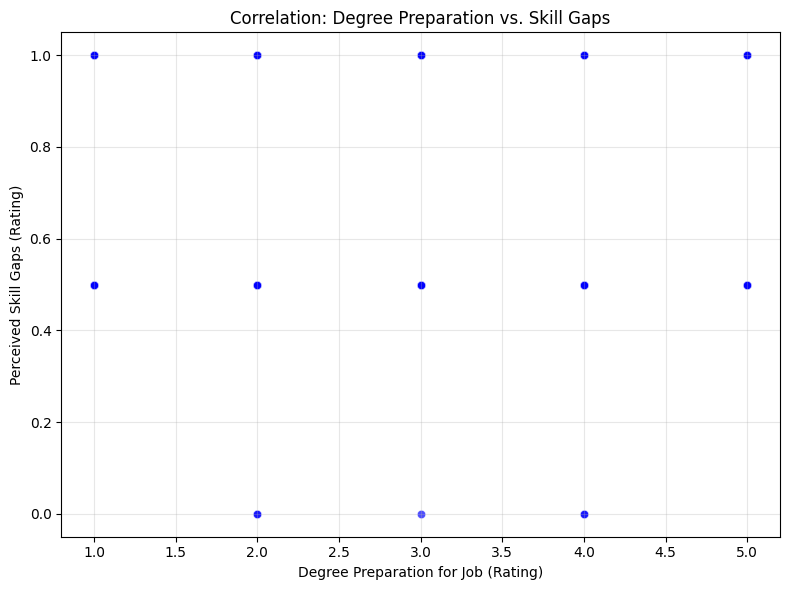

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=educational_data[degree_preparation_col],
    y=educational_data[skill_gaps_col],
    alpha=0.7,
    color='blue'
)
plt.title('Correlation: Degree Preparation vs. Skill Gaps')
plt.xlabel('Degree Preparation for Job (Rating)')
plt.ylabel('Perceived Skill Gaps (Rating)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretation of Educational Assessment:
A correlation of -0.10 suggests that there is very little relationship between the two variables.
Negative correlation means that, very slightly, as the degree preparation rating increases, the perceived skill gaps tend to increase, but this is a very weak trend.
The correlation is so low that it indicates no significant linear relationship between degree preparation and perceived skill gaps.

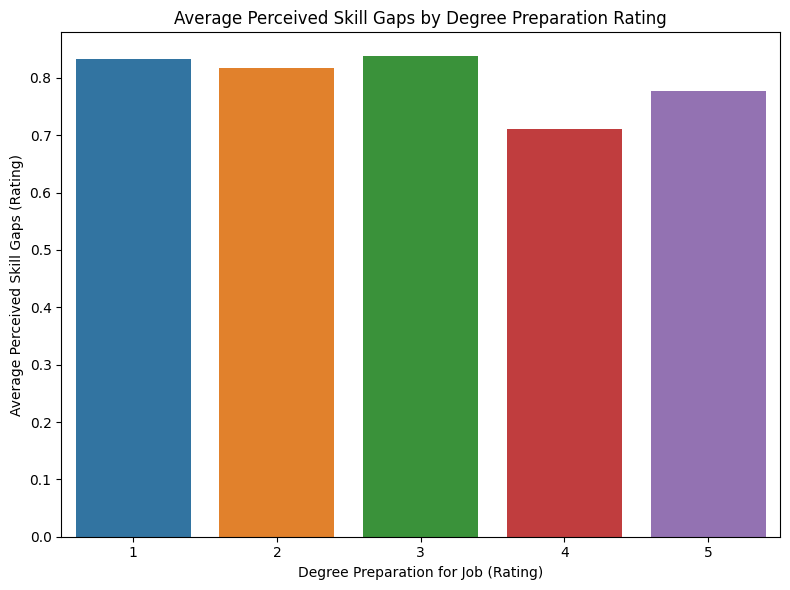

In [42]:
grouped_data = survey_df.groupby(degree_preparation_col)[skill_gaps_col].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data[degree_preparation_col], y=grouped_data[skill_gaps_col])
plt.title('Average Perceived Skill Gaps by Degree Preparation Rating')
plt.xlabel('Degree Preparation for Job (Rating)')
plt.ylabel('Average Perceived Skill Gaps (Rating)')
plt.tight_layout()
plt.show()

##### Interpretation of Educational Assessment:
It seems that respondents who rated their degree preparation as 1 or 3 perceive the most significant skill gaps, while those who rated their preparation as 4 or 5 tend to perceive lower skill gaps.
Ratings 2 and 5 are relatively similar, but not as low as 4.